In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Dropout
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
saved_df = pd.read_csv('/content/driver/MyDrive/ColabNotebooks/DGT/Date_Revenue.csv')

In [ ]:
saved_df['DATE_DIM'] = pd.to_datetime(saved_df['DATE_DIM'])

df_day = saved_df.groupby('DATE_DIM').sum()

df_day

,TOTAL_TURNOVER
DATE_DIM,
2021-01-01,3835763.01
2021-01-02,6165935.03
2021-01-03,2198013.19
2021-01-04,1523612.17
2021-01-05,1480832.82
...,...
2022-12-27,2413850.20
2022-12-28,3379823.57
2022-12-29,2862803.99


<Axes: xlabel='DATE_DIM'>

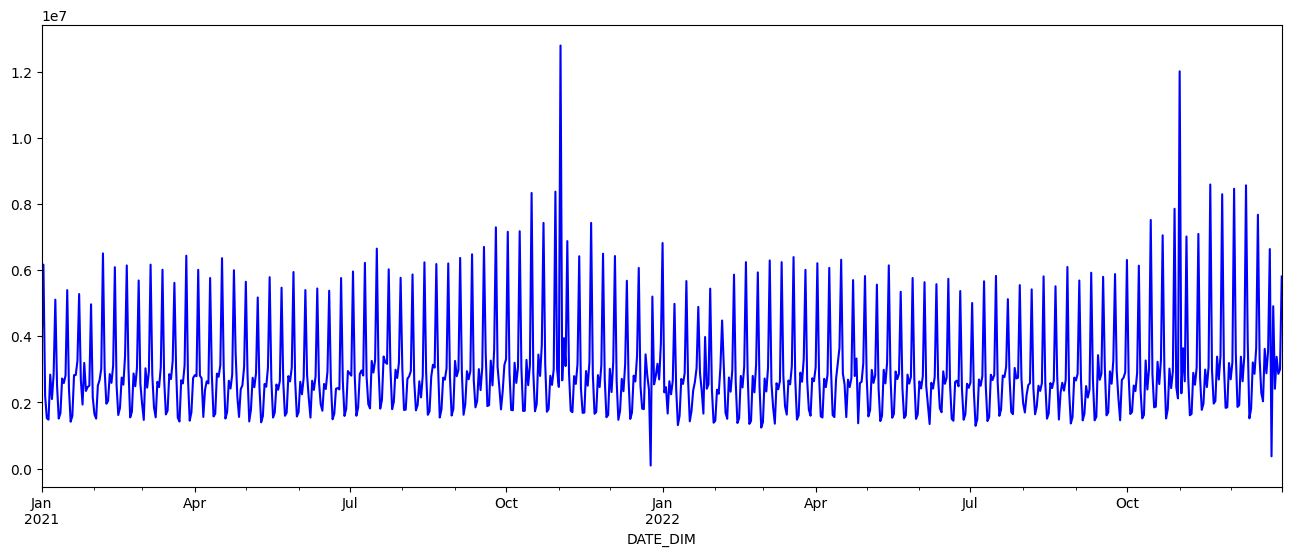

In [ ]:
plt.figure(figsize=(16,6))
df_day['TOTAL_TURNOVER'].plot(kind='line', color='b')

In [ ]:
data_end = int(np.floor(0.8*(df_day.shape[0])))
train = df_day[0:data_end]['TOTAL_TURNOVER']
train = train.values.reshape(-1)
test = df_day[data_end:]['TOTAL_TURNOVER'].values.reshape(-1)

In [ ]:
print(test)

[ 1641752.17        1882349.62        2505522.94        2348252.33
  2583834.08        5810537.93000002  2596408.91        1509407.4
  1665908.88        2586683.27        2434071.65        2661443.67
  5511705.6         2800280.37        1482401.17        2300559.29
  2594863.7         2356699.53        2684249.26        6096033.52000002
  2345277.27        1364087.24        1554623.89        2751544.6
  2663854.57        2860294.74        5686666.17000002  2657041.52
  1459561.31        1659184.24        2495082.98        2149738.8
  2388950.92        5921607.61000001  2693608.35        1460240.15
  1563587.22        3429903.18000001  2683269.57000001  2867820.57000001
  5798303.37000001  3047891.61        1610272.75        1694314.7
  2939444.68        2565471.01        3269265.76000001  5879800.34000003
  2947857.42        2118335.16        1461766.54        2681810.85
  2744128.39        2910894.85        6306765.45000002  2811345.69
  1651808.31        1714642.39        2512369.74

In [ ]:
print(train)

[ 3835763.01        6165935.03        2198013.19        1523612.17
  1480832.82        2840790.91        2102677.7         2840710.01
  5107419.13        2523174.07        1511987.74        1678378.41
  2724093.12        2586452.97        2813910.47000001  5395811.99000002
  2429877.87        1417811.13        1592300.05        2826226.46
  2827950.02        3259826.04        5276781.01000003  2677247.39
  1936277.26        3195359.64        2347517.55        2466103.03
  2506389.51        4966445.83000001  2156540.22        1641003.03
  1510845.49        2511063.91        2674547.73        3014008.55
  6505983.53000001  2979002.11        1961404.73        2046207.82
  2858018.92        2592826.64        3112316.19        6088222.72
  2525511.76        1621178.57        1833504.81        2752410.09
  2537996.95        3407134.15000001  6141962.45000001  3041708.65
  1548228.66        1714919.12        2875405.01        2488051.76
  3053873.89        5686970.29000002  2568495.33        

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

In [ ]:
def get_data(train,test,time_step,num_predict):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])

  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test)

In [ ]:
x_train, y_train, x_test, y_test = get_data(train,test,60,1)


x_train = x_train.reshape(-1,60)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

x_test = x_test.reshape(-1,60)

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
x_train = x_train.reshape(-1,60,1)
y_train = y_train.reshape(-1,1)

x_test = x_test.reshape(-1,60,1)
y_test = y_test.reshape(-1,1)

In [ ]:
n_input = 60
n_features = 1

model = Sequential()
model.add(Conv1D(filters=50, kernel_size=3, activation='relu', input_shape=(n_input, n_features), padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=60, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=50, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=60, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, verbose=1)

model.save('/content/driver/My Drive/ColabNotebooks/DGT/1DCNNmodel60_to_1forecast.h5')

Epoch 1/500
14/14 [==============================] - 5s 114ms/step - loss: 0.0107 - val_loss: 0.0512
Epoch 2/500
14/14 [==============================] - 1s 56ms/step - loss: 0.0108 - val_loss: 0.0514
Epoch 3/500
14/14 [==============================] - 1s 67ms/step - loss: 0.0115 - val_loss: 0.0537
Epoch 4/500
14/14 [==============================] - 1s 72ms/step - loss: 0.0138 - val_loss: 0.0539
Epoch 5/500
14/14 [==============================] - 1s 63ms/step - loss: 0.0118 - val_loss: 0.0534
Epoch 6/500
14/14 [==============================] - 1s 48ms/step - loss: 0.0091 - val_loss: 0.0511
Epoch 7/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0101 - val_loss: 0.0476
Epoch 8/500
14/14 [==============================] - 1s 71ms/step - loss: 0.0080 - val_loss: 0.0476
Epoch 9/500
14/14 [==============================] - 1s 85ms/step - loss: 0.0089 - val_loss: 0.0469
Epoch 10/500
14/14 [==============================] - 1s 95ms/step - loss: 0.0091 - val_loss: 0.046

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 7ms/step


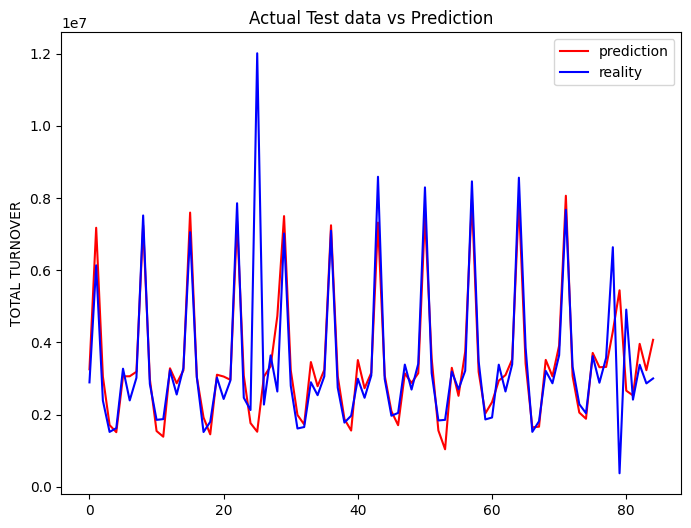

In [ ]:
model = keras.models.load_model('/content/driver/My Drive/ColabNotebooks/DGT/1DCNNmodel60_to_1forecast.h5')

test_output = model.predict(x_test)

from sklearn.metrics import mean_squared_error

test_mse_loss = mean_squared_error(y_test, test_output)

test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)

plt.figure(figsize=(8,6))
plt.plot(test_1, color='r')
plt.plot(test_2 ,color='b')
plt.title("Actual Test data vs Prediction")
plt.ylabel("TOTAL TURNOVER")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [ ]:
test_mse_loss

0.4472463754147028

In [ ]:
y_test.shape

(85, 1)

17/17 [==============================] - 0s 11ms/step


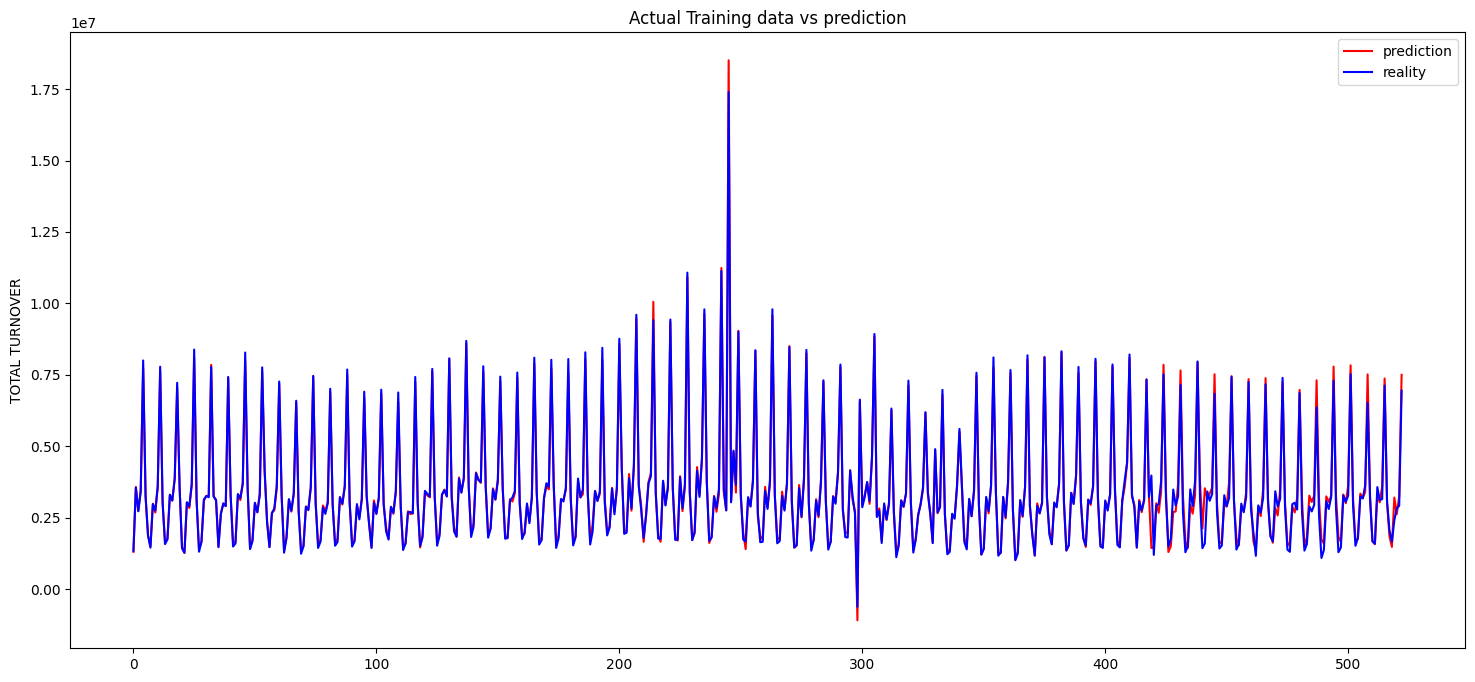

In [ ]:
test_output = model.predict(x_train)

train_1 = scaler.inverse_transform(test_output)
train_2 = scaler.inverse_transform(y_train)
plt.figure(figsize=(18,8))
plt.plot(train_1, color='r')
plt.plot(train_2 ,color='b')
plt.title("Actual Training data vs prediction")
plt.ylabel("TOTAL TURNOVER")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

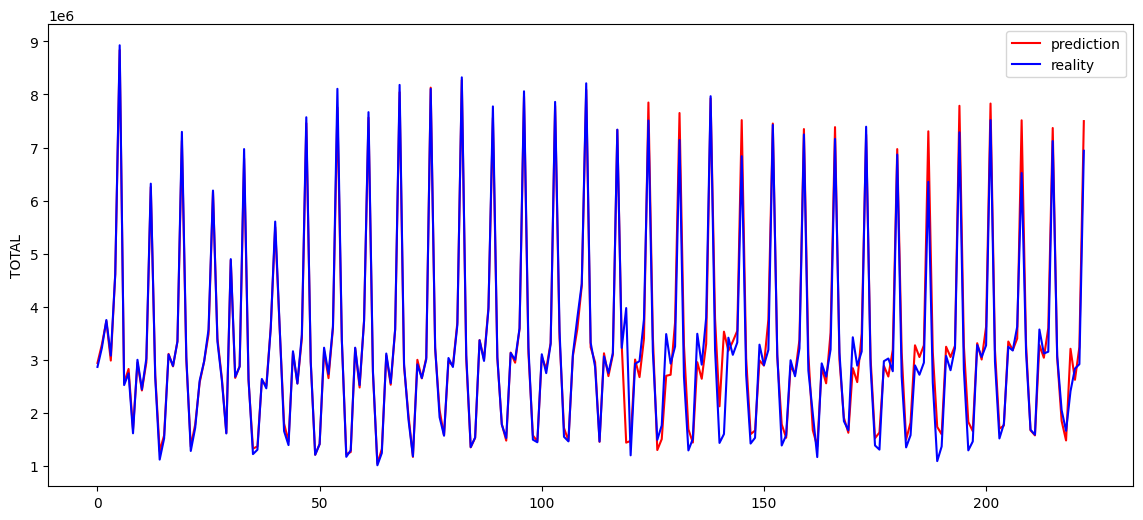

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_1[300:600], color='r')
plt.plot(train_2[300:600] ,color='b')
# plt.title("TOTAL TURNOVER")
plt.ylabel("TOTAL")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

#Forecast for the upcoming time based on previous data

In [ ]:
future_days = 30
last_sequence = train_scaled[-60:]
forecast = []
for _ in range(future_days):
    next_value = model.predict(last_sequence.reshape(1, 60, 1))
    forecast.append(next_value[0])
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)


1/1 [==============================] - 0s 33ms/step


In [ ]:
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Tạo index cho dự đoán
last_date = 730
# index = pd.date_range(start=last_date, periods=future_days+1, closed='right')
# index = index[1:]
index = pd.RangeIndex(start=last_date, stop=last_date+future_days, step=1)

# Tạo DataFrame cho dự đoán
forecast_df = pd.DataFrame(forecast, index=index, columns=['Forecast'])

# In kết quả
print(forecast_df)



        Forecast
730  1634334.500
731  1548422.625
732  3382214.500
733  3040623.000
734  3616784.500
735  7875765.500
736  3296178.000
737  1621034.375
738  1778178.750
739  3061570.000
740  3043436.750
741  3349535.000
742  7583404.000
743  3091630.000
744  1862128.375
745  1558554.375
746  3298898.750
747  2913726.750
748  3305788.500
749  7833671.500
750  3312852.000
751  1643032.625
752  1550732.000
753  3255679.500
754  3123702.500
755  3527037.000
756  7825369.000
757  3211970.000
758  1692032.125
759  1581164.750


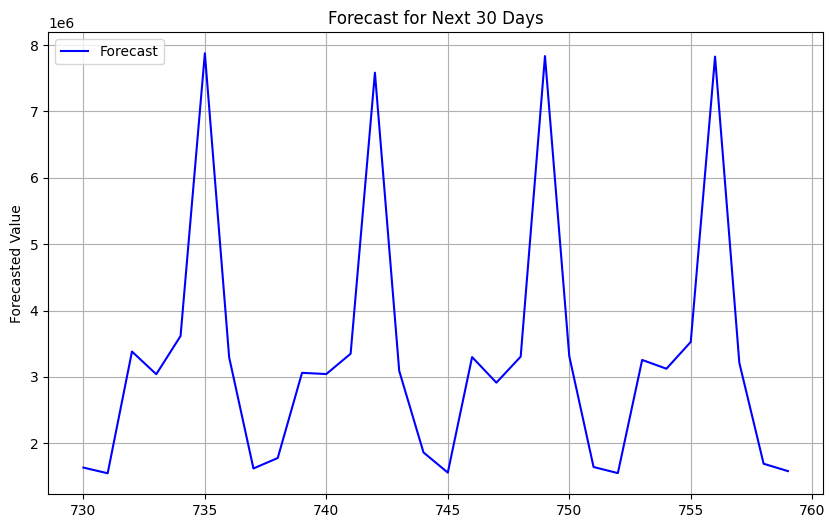

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='blue')
plt.ylabel('Forecasted Value')
plt.title('Forecast for Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
last_date = pd.to_datetime('2022-12-31')
index = pd.date_range(start=last_date, periods=future_days+1)
index = index[1:]


# Tạo DataFrame cho dự đoán
forecast_df = pd.DataFrame(forecast, index=index, columns=['Forecast'])


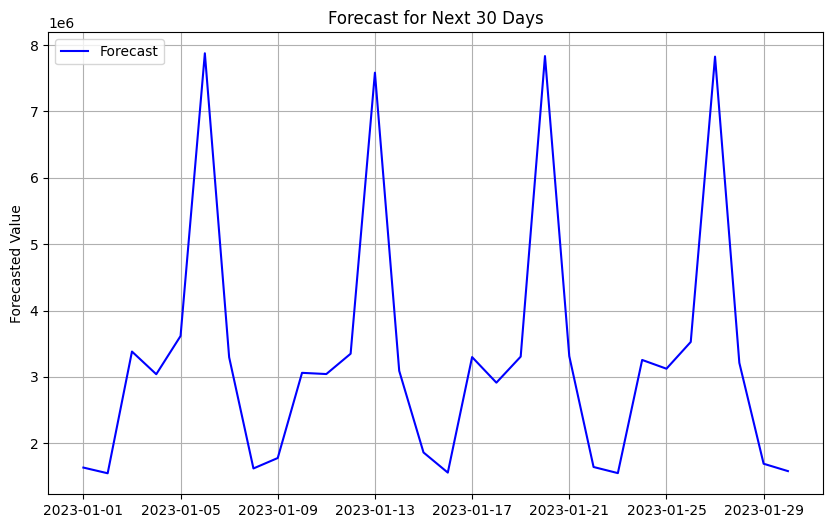

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='blue')
plt.ylabel('Forecasted Value')
plt.title('Forecast for Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()

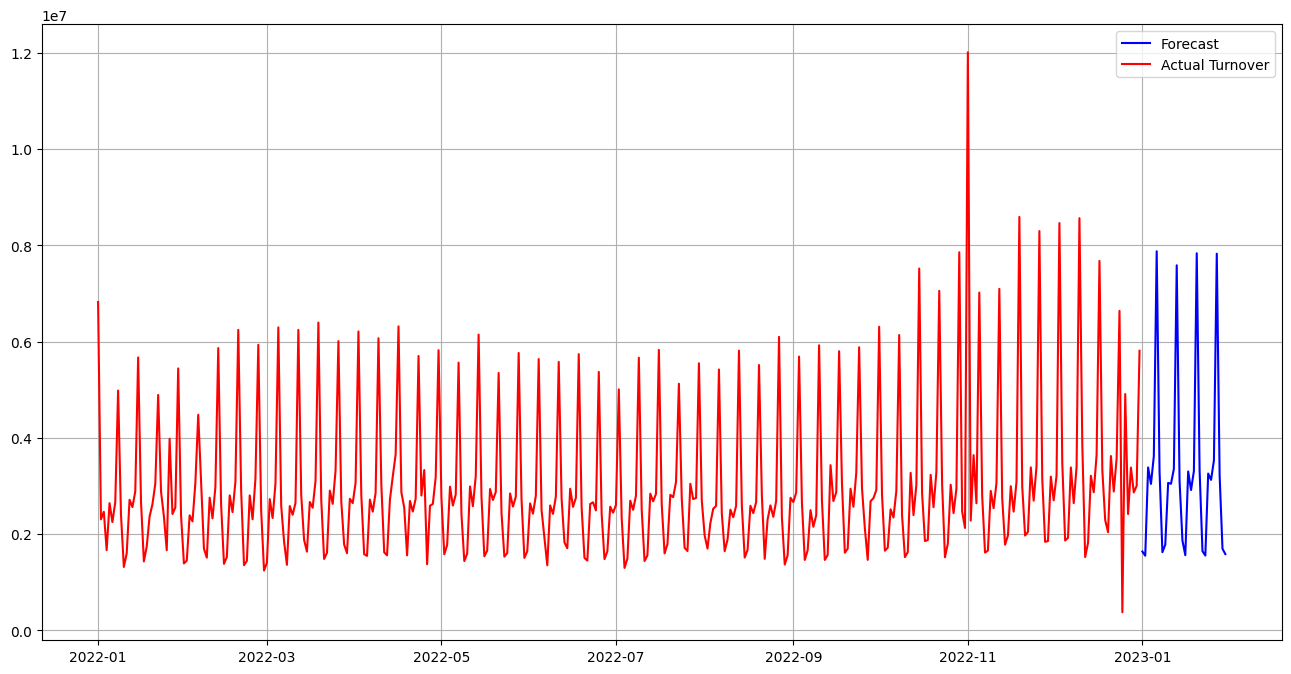

In [ ]:

actual_value = df_day.tail(365)

plt.figure(figsize=(16, 8))

# Vẽ đồ thị cho df1
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='blue')

# # Vẽ đồ thị cho df2
plt.plot(actual_value.index, actual_value['TOTAL_TURNOVER'] , label='Actual Turnover', color='red')

plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

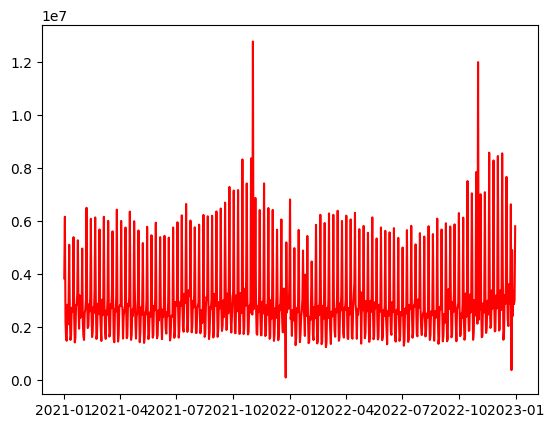

In [ ]:
plt.plot(df_day.index, df_day['TOTAL_TURNOVER'] , label='Actual Turnover', color='red')

In [ ]:
future_days = 120
last_sequence = train_scaled[-60:]
forecast = []
for _ in range(future_days):
    next_value = model.predict(last_sequence.reshape(1, 60, 1))
    forecast.append(next_value[0])
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)


1/1 [==============================] - 0s 21ms/step


In [ ]:
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

last_date = pd.to_datetime('2022-12-31')
index = pd.date_range(start=last_date, periods=future_days+1)
index = index[1:]


# Tạo DataFrame cho dự đoán
forecast_df = pd.DataFrame(forecast, index=index, columns=['Forecast'])

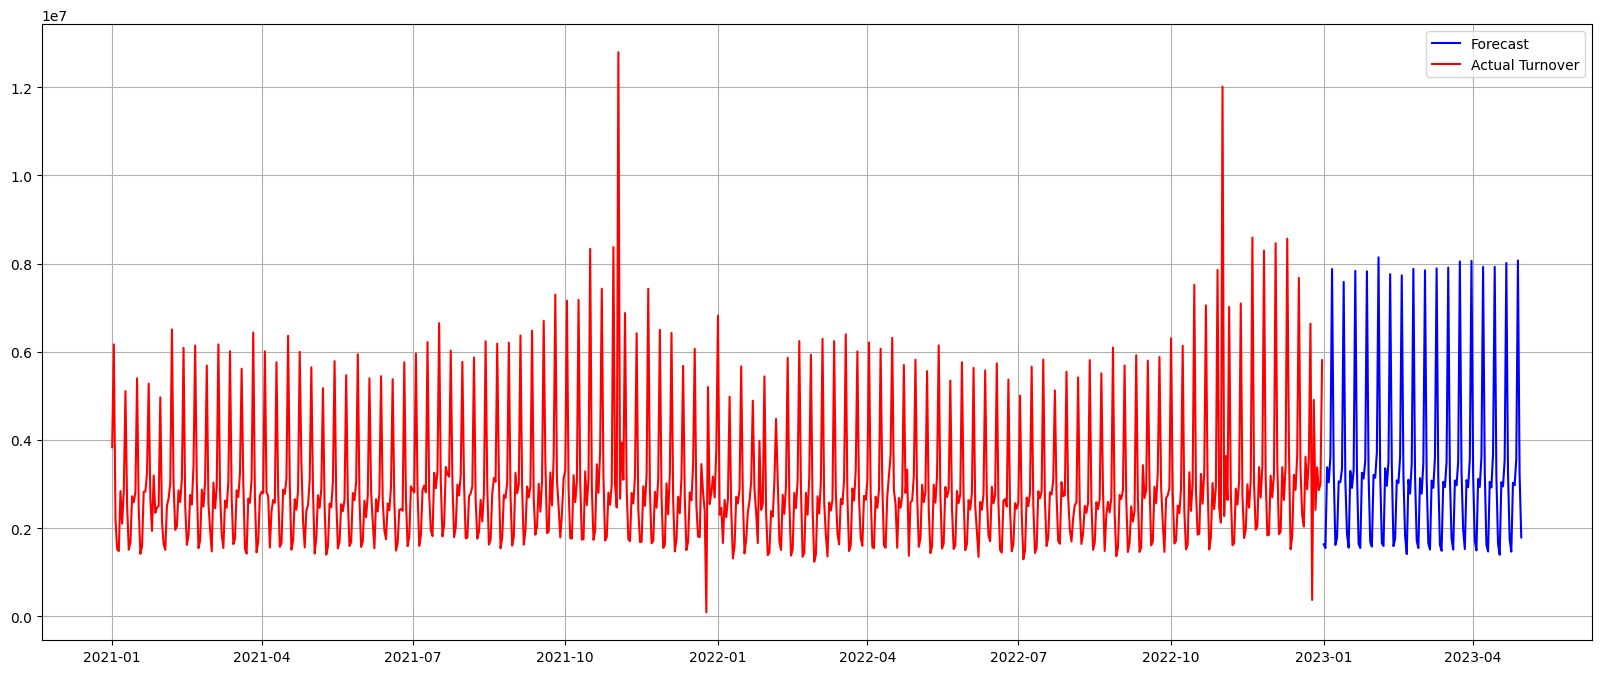

In [ ]:

actual_value = df_day

plt.figure(figsize=(20, 8))

# Vẽ đồ thị cho df1
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='blue')

# # Vẽ đồ thị cho df2
plt.plot(actual_value.index, df_day['TOTAL_TURNOVER'] , label='Actual Turnover', color='red')

plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()